## MNIST Handwritten Digit Classification
 
 This project demonstrates the use of a simple feed-forward neural network to classify handwritten digits from the MNIST dataset.
 
 ### Steps:
 1. **Data Loading and Preprocessing**
 2. **Model Definition**
 3. **Model Compilation**
 4. **Training the Model**
 5. **Model Evaluation**
 6. **Predictions and Visualizations**
 ---

### Importing Required Libraries
The following libraries are required for loading the dataset, preprocessing the data, building the model, and visualizing the results.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

### 1. Data Loading and Preprocessing
- The MNIST dataset is loaded using `tensorflow.keras.datasets`.
- The data is normalized to ensure values lie in the range [0, 1].
- The labels are one-hot encoded for multi-class classification.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Visualizing Sample Images
Display the first 5 images from the training dataset.

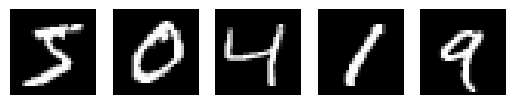

In [3]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

### 2. Model Definition
The neural network has:
- A **Flatten layer** to convert 2D images to 1D vectors.
- A **Dense layer** with 128 units and ReLU activation.
- An output **Dense layer** with 10 units and softmax activation (for 10 classes).

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with softmax activation
])

c:\Users\ghass\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 3. Model Compilation
Compile the model using:
- **Adam optimizer** for efficient gradient updates.
- **Categorical crossentropy loss** for multi-class classification.
- Track **accuracy** as a performance metric.

In [5]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### 4. Training the Model

In [6]:
# Train the model for 5 epochs with a batch size of 32 and a validation split of 20%.
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8601 - loss: 0.4798 - val_accuracy: 0.9493 - val_loss: 0.1701
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9592 - loss: 0.1385 - val_accuracy: 0.9641 - val_loss: 0.1226
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9727 - loss: 0.0915 - val_accuracy: 0.9698 - val_loss: 0.1042
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0664 - val_accuracy: 0.9735 - val_loss: 0.0894
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9722 - val_loss: 0.0941


### 5. Evaluating the Model

In [7]:
# Evaluate the model on the test dataset to calculate test loss and accuracy.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9735 - loss: 0.0927
0.08279930800199509 0.9757999777793884


### 6. Visualizing Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


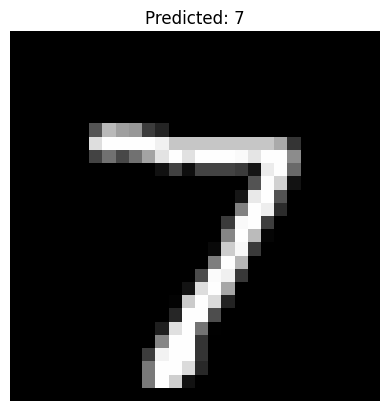

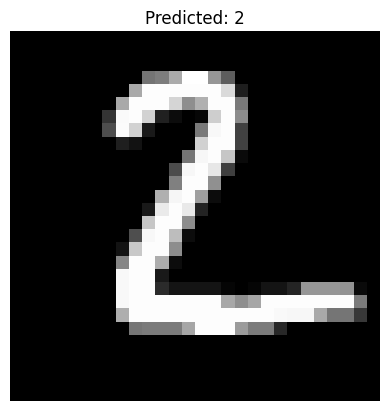

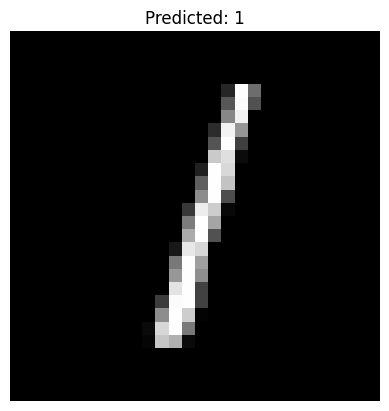

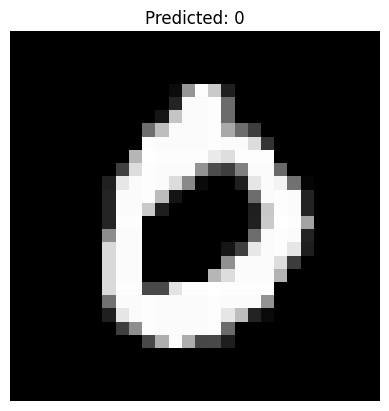

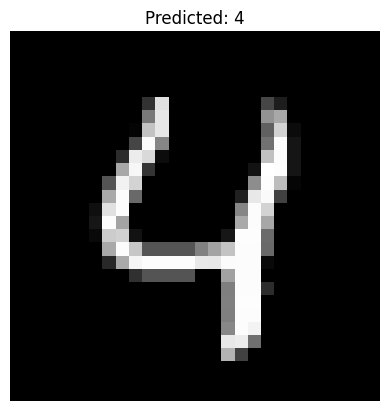

In [8]:
# Display the first 5 test images alongside their predicted labels.
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

### 7. Plotting Loss and Accuracy Curves
Plot the training and validation loss/accuracy over epochs for better insights into the model's performance.

In [9]:
# Extracting data from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

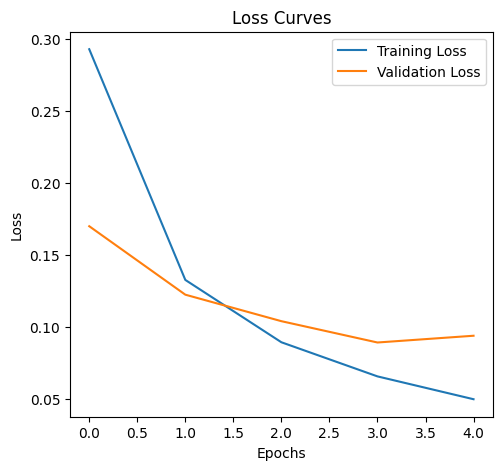

In [10]:
# Plotting loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

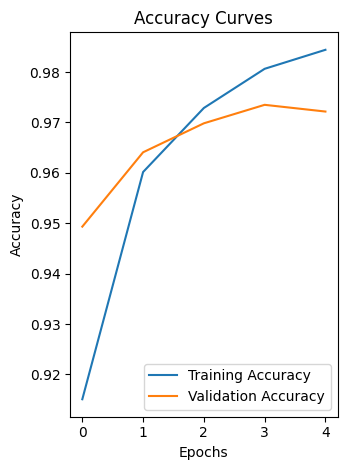

In [11]:
# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion
- **Test Accuracy**: The model achieved approximately **98% accuracy** on the test set.
- **Performance Insights**:
    - The simple feed-forward architecture performs well for classifying handwritten digits.
    - Loss and accuracy curves show consistent training, with minimal overfitting.
- **Potential Improvements**:
    - Use **Convolutional Neural Networks (CNNs)** for better feature extraction.
    - Experiment with deeper architectures or data augmentation for enhanced accuracy.